<a href="https://colab.research.google.com/github/SofiiaHeryha/python/blob/main/Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

products = pd.read_csv("/content/drive/MyDrive/products06.csv")
print(products.info())
products.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
None


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [6]:
events = pd.read_csv("/content/drive/MyDrive/events06.csv")

#Data cleaning
events["Country Code"] = events["Country Code"].fillna("Unknown")
events = events.dropna(subset=["Units Sold"]) #If values are missing due to data collection errors, it is better to delete such rows
df["sales_channel"] = df["sales_channel"].str.capitalize()

#Data type
events['Order Date'] = pd.to_datetime(events['Order Date'])
events['Ship Date'] = pd.to_datetime(events['Ship Date'])

print(events.info())
events.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB
None


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79


In [4]:
countries = pd.read_excel("/content/drive/MyDrive/countries06.xlsx")

#Data cleaning
countries[["region", "sub-region", "alpha-2"]] = countries[["region", "sub-region", "alpha-2"]].fillna("Unknown")

print(countries.info())
countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


products.id = events.Product ID

events.Country Code = countries.alpha-3

In [7]:
df = pd.merge(events, countries, left_on="Country Code", right_on="alpha-3", how="left")
df = pd.merge(df, products, left_on="Product ID", right_on="id", how="left")
df.drop(columns=["id", "alpha-2", "alpha-3"], inplace=True)
df.rename(columns={
    "Order ID": "order_id",
    "Order Date": "order_date",
    "Ship Date": "ship_date",
    "Order Priority": "order_priority",
    "Country Code": "country_code",
    "name": "country_name",
    "region": "region",
    "sub-region": "sub_region",
    "Product ID": "product_id",
    "item_type": "product_category",
    "Sales Channel": "sales_channel",
    "Units Sold": "units_sold",
    "Unit Price": "unit_price",
    "Unit Cost": "unit_cost"}, inplace=True)

df["revenue"] = df["units_sold"] * df["unit_price"]
df["cost"] = df["units_sold"] * df["unit_cost"]
df["profit"] = df["revenue"] - df["cost"]
df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days

df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub_region,product_category,revenue,cost,profit,delivery_days
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,Household,3136191.11,2358420.22,777770.89,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38


In [8]:
print(f"Total Orders: {df['order_id'].nunique()}")
print(f"Total Revenue: ${df['revenue'].sum():,.2f}")
print(f"Total Profit: ${df['profit'].sum():,.2f}")
print(f"Countries Covered: {df['country_name'].nunique()}")
print(f"Unique Products: {df['product_id'].nunique()}")

Total Orders: 1328
Total Revenue: $1,702,129,408.21
Total Profit: $501,434,459.00
Countries Covered: 45
Unique Products: 12


/tmp/ipython-input-1853642359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


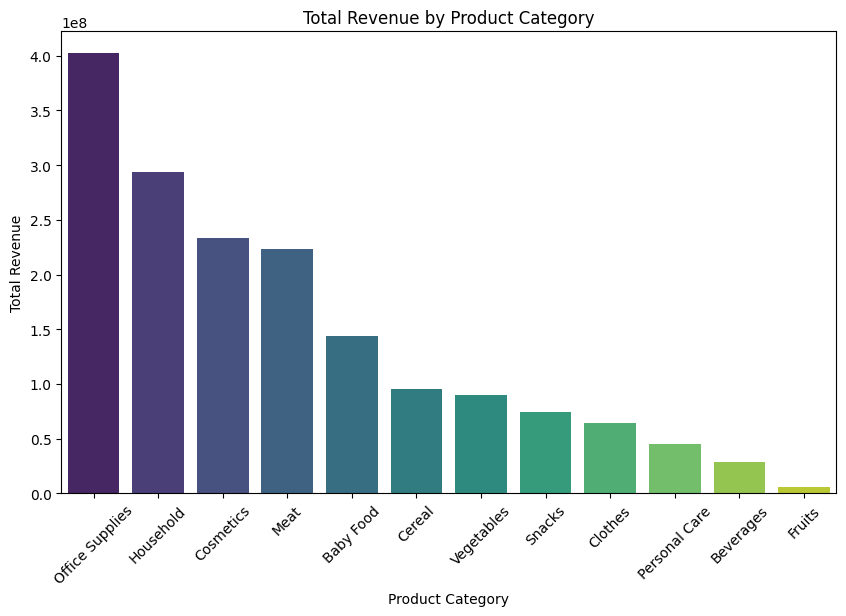

/tmp/ipython-input-1853642359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


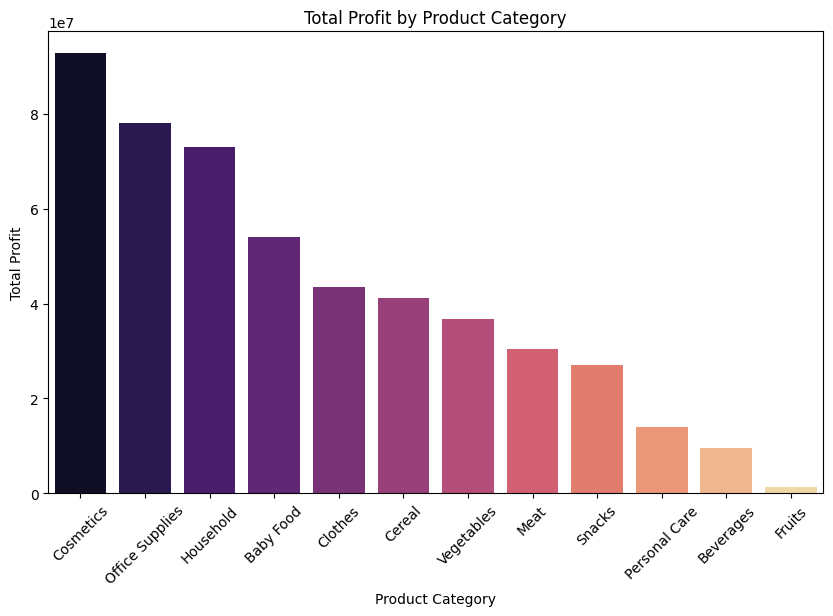

In [13]:
revenue_order = df.groupby("product_category")["revenue"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="product_category",
    y="revenue",
    estimator=sum,
    errorbar=None,
    palette="viridis",
    order=revenue_order
)
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

profit_order = df.groupby("product_category")["profit"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="product_category",
    y="profit",
    estimator=sum,
    errorbar=None,
    palette="magma",
    order=profit_order
)
plt.title("Total Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

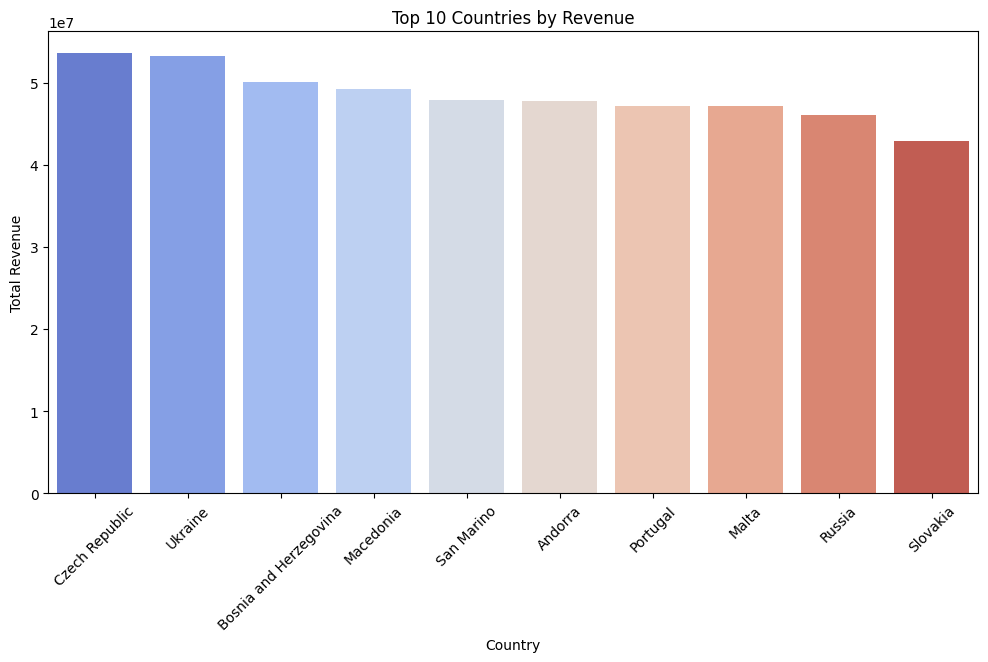

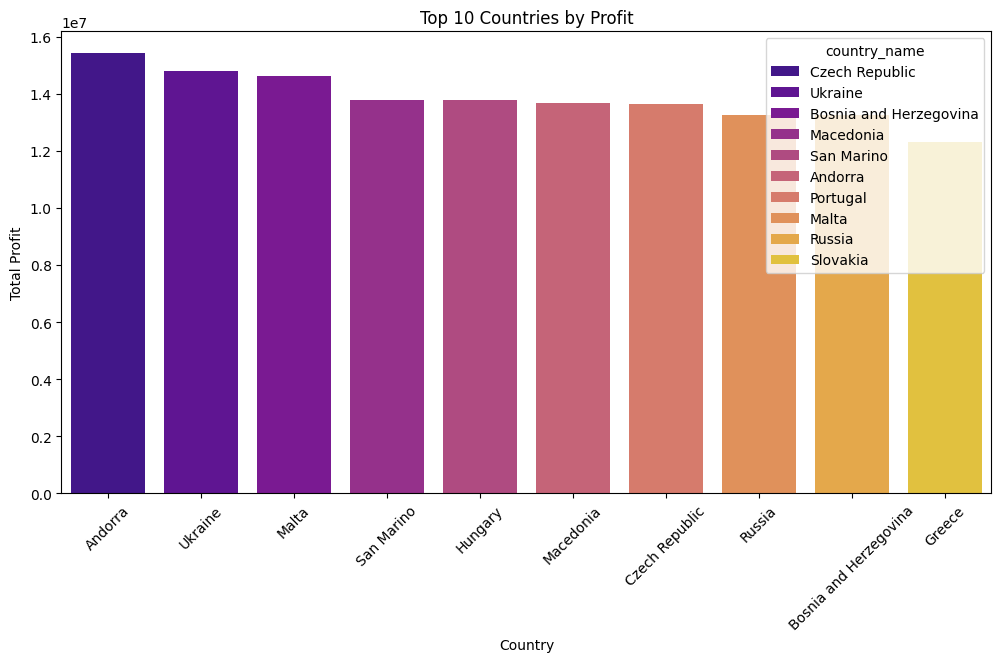

In [ ]:
top_countries = df.groupby("country_name")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

top_countries_profit = df.groupby("country_name")["profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_profit.index, y=top_countries_profit.values,hue=top_countries.index, palette="plasma")
plt.title("Top 10 Countries by Profit")
plt.xlabel("Country")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

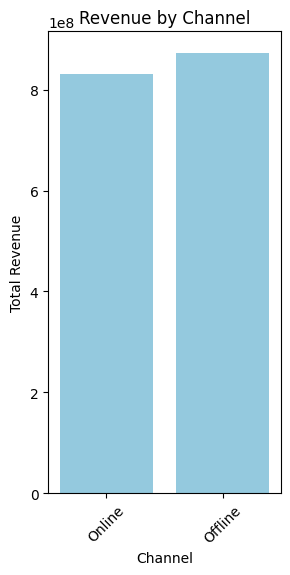

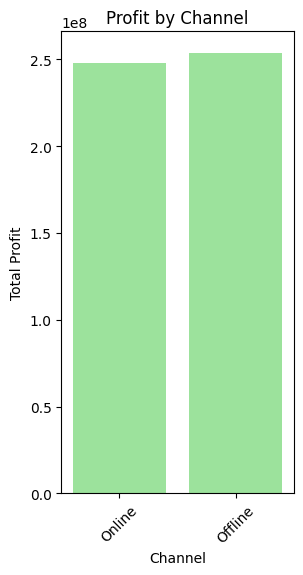

In [ ]:
plt.figure(figsize=(3,6))
sns.barplot(data=df, x="sales_channel", y="revenue", estimator=sum, errorbar=None, color = "skyblue")
plt.title("Revenue by Сhannel")
plt.xlabel("Сhannel")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(3,6))
sns.barplot(data=df, x="sales_channel", y="profit", estimator=sum, errorbar=None, color ="lightgreen")
plt.title("Profit by Сhannel")
plt.xlabel("Сhannel")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

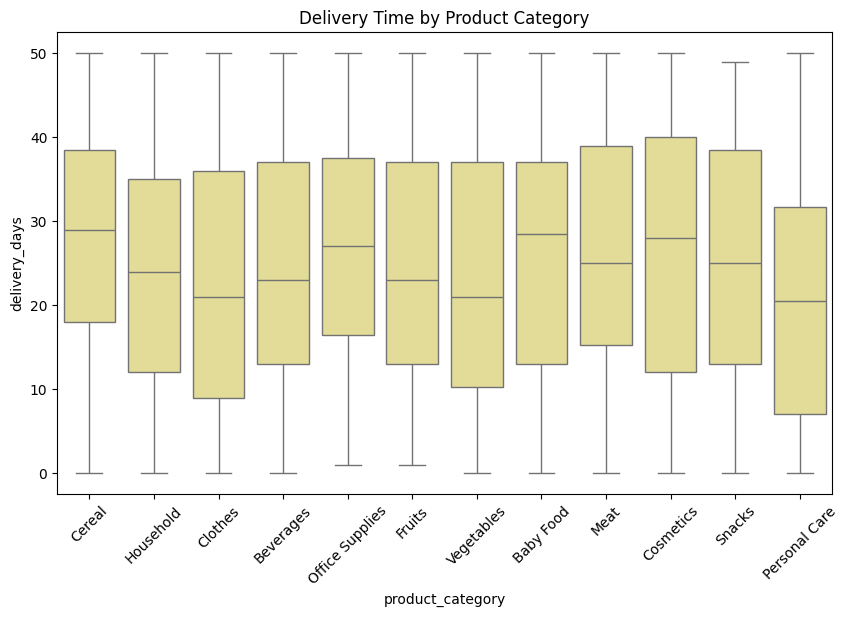

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="product_category", y="delivery_days",color = "khaki")
plt.title("Delivery Time by Product Category")
plt.xticks(rotation=45)
plt.show()

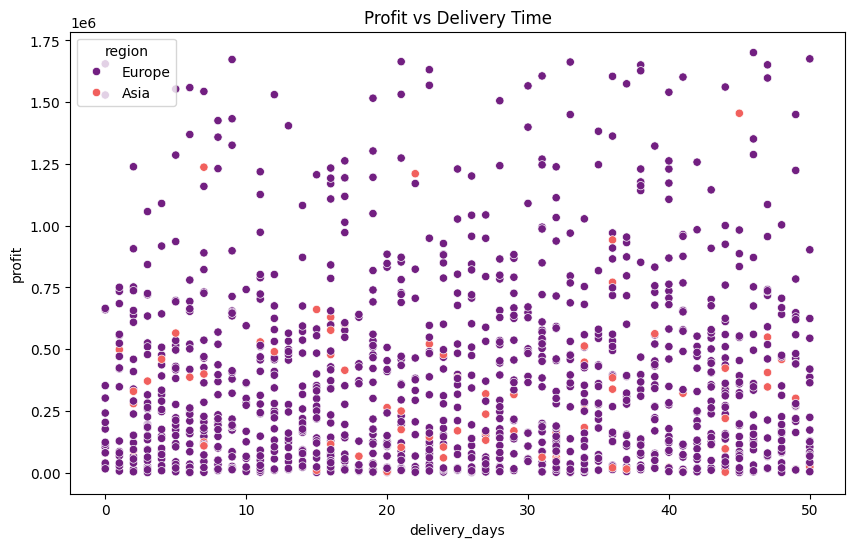

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="delivery_days", y="profit", hue="region", palette="magma")
plt.title("Profit vs Delivery Time")
plt.show()

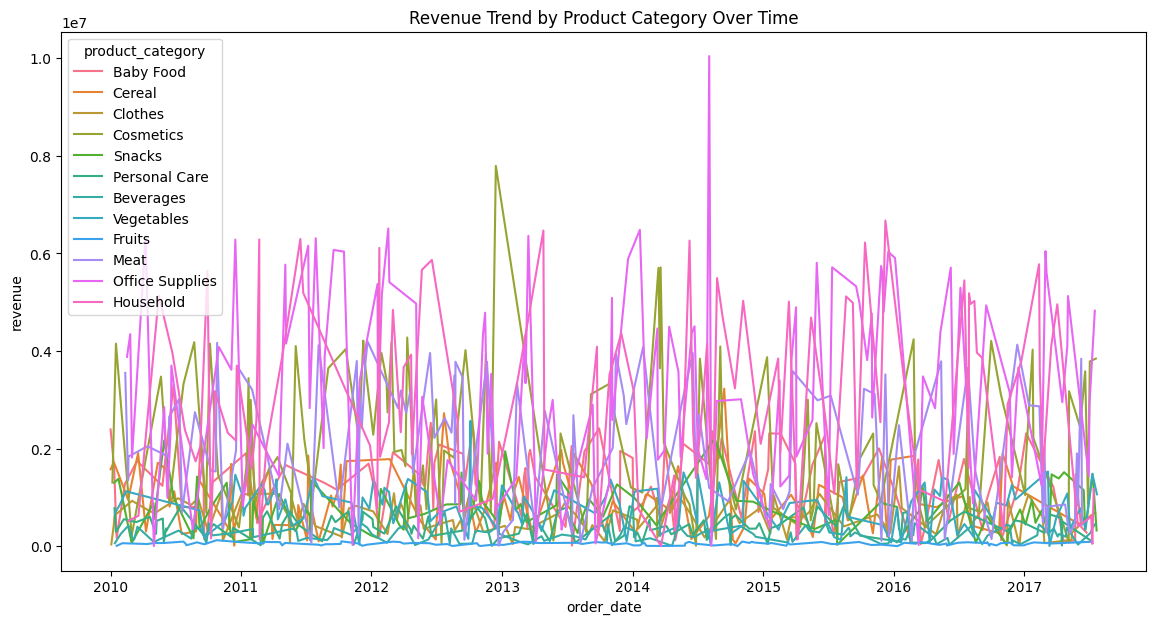

In [ ]:
sales_trend = df.groupby(['order_date', 'product_category'])['revenue'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=sales_trend, x='order_date', y='revenue', hue='product_category')
plt.title("Revenue Trend by Product Category Over Time")
plt.show()

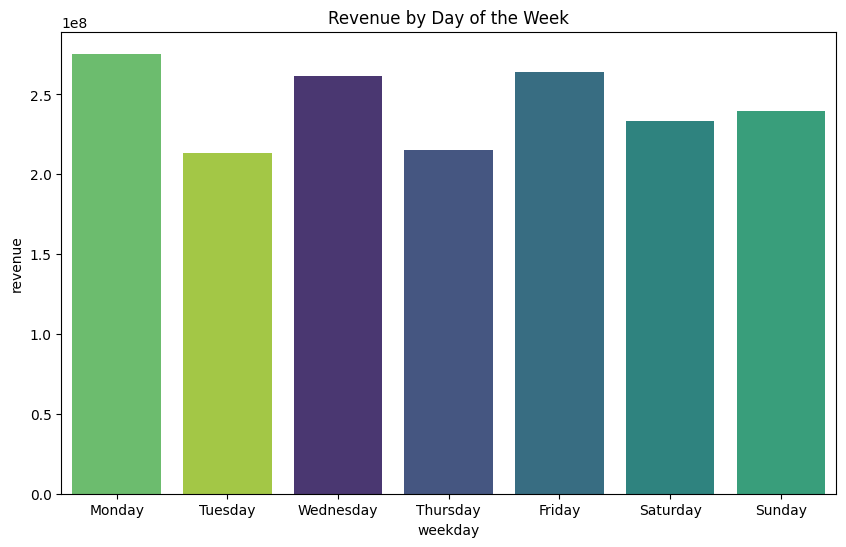

In [ ]:
df["weekday"] = df["order_date"].dt.day_name()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='weekday', y='revenue', estimator=sum, errorbar=None,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue="weekday", palette="viridis")
plt.title("Revenue by Day of the Week")
plt.show()

### Profit by product category
*Leaders*: Cosmetics, Office Supplies, Household

*Outsiders*: Fruits, Vegetables

**Interpretation:**

High-margin categories are key to focus resources

Low-margin categories require a review of positioning or cost model

### Revenue by product category
*Highest revenue:* Office Supplies, Household

*Lowest:* Fruits

**Interpretation:**

High revenue signals successful demand

Low revenue is a point for strategic optimization

###Top 10 countries by revenue
*Leaders*: Czech Republic, Ukraine

*Lowest among the top* — Slovakia

**Interpretation:**

Growth potential in leading countries

It is recommended to increase activity in the lower segment with the help of adapted campaigns

###Top 10 countries by profit
*Leader:* Andorra, high figures in Ukraine and Malta

*Lowest:* Greece, but also within the profitability range

**Interpretation:**

High profitability is the result of an effective sales model

Suggestion to review the cost part in less profitable countries

###Sales Channel Analysis: Revenue and Profit

Offline channel generates slightly more revenue than Online (~9e8 vs. ~8e8)

However, profit is the same for both channels (~2.5 × 10⁸ in each case)

**Interpretation:**

Online channel demonstrates higher margin: with lower revenue it brings the same profit

Offline remains a reliable commercial model, but has a higher cost part

Development potential — in expanding online sales, improving digital experience, optimizing marketing

###Delivery times by category

*Fastest:* Snacks, Beverages

*Variable:* Meat, Baby Food, Personal Care

**Interpretation:**

Narrow ranges — stable logistics

Wide — need for supply optimization

###Revenue by day of the week

*Peak:* Wednesday, dip: Tuesday

Generally even distribution

**Interpretation:**

Strengthen marketing during peak times of the day, drive sales during weaker periods

##Overall conclusion:
The report showed that the highest financial indicators are provided by *Cosmetics, Office Supplies,* and *Ukraine, Andorra and Czech Republic* are strategic leaders by country. Both sales channels work effectively, and online has potential for growth.Logistics performance varies across categories and regions, so it is recommended to optimize supply chains. Temporal and behavioral trends open up opportunities for seasonal planning, promotions, and omnichannel development.